<a href="https://colab.research.google.com/github/NjokiMbugua/spamdata-predictions-kNN-naive-bayes/blob/main/DSC9_Independent_Project_week_9_Naive_Bayes_Njoki_Mbugua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

## a.Specific Question

Implementing naive bayes classifier on the spam data using the 80:20,70:30 and 60:40 partitioning to predict whether email is spam or not.

## b.Defining Metrics for success

Create an accurate model that is able to accurately predicts the target variable.

## c.Understanding the context

Doing a background search to understand the titanic disaster and review the dataset description in order to be able to draw a concrete data analysis plan.

## d.Recording the experimental design

Data Cleaning

Exploratory Data Analysis

Naive bayes model implementation

Improving Model Performance

## e.Data Relevance

Cross checking the data to ensure it is relevant to the topic of study and adequate enough to answer the research question.

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

# Reading the data

In [2]:
# Url= https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
spam = pd.read_csv('/content/spambase.data')
spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [3]:
#Introducing headers for the columns
headers = ["a","b","c","d", "e","f",
         "g","h","i", "j","k","l","m","n", "o","p",
         "q","r","s", "t","u","v","w","x", "y","z",
         "ab","ac","ad", "ae","af","ag","ah","ai", "aj","ak",
         "al","am","an", "ao","ap","aq","ar","as", "at","au",
         "av","aw","ax", "ay","az","bc","bd","be", "bf","bg",
         "bh","Spam"]

In [4]:
#Using the above headers as column names
spam.columns = headers

# Checking the dataset

In [5]:
# previewing the last five records of the dataset
spam.tail()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,ab,ac,ad,ae,af,ag,ah,ai,aj,ak,al,am,an,ao,ap,aq,ar,as,at,au,av,aw,ax,ay,az,bc,bd,be,bf,bg,bh,Spam
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [6]:
# checking the shape
spam.shape

(4600, 58)

In [7]:
# getting information about the datatypes
spam.dtypes

a       float64
b       float64
c       float64
d       float64
e       float64
f       float64
g       float64
h       float64
i       float64
j       float64
k       float64
l       float64
m       float64
n       float64
o       float64
p       float64
q       float64
r       float64
s       float64
t       float64
u       float64
v       float64
w       float64
x       float64
y       float64
z       float64
ab      float64
ac      float64
ad      float64
ae      float64
af      float64
ag      float64
ah      float64
ai      float64
aj      float64
ak      float64
al      float64
am      float64
an      float64
ao      float64
ap      float64
aq      float64
ar      float64
as      float64
at      float64
au      float64
av      float64
aw      float64
ax      float64
ay      float64
az      float64
bc      float64
bd      float64
be      float64
bf      float64
bg        int64
bh        int64
Spam      int64
dtype: object

In [8]:
# Checking the size of the dataset
spam.size

266800

In [9]:
# Getting general information on the dataset
spam.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       4600 non-null   float64
 1   b       4600 non-null   float64
 2   c       4600 non-null   float64
 3   d       4600 non-null   float64
 4   e       4600 non-null   float64
 5   f       4600 non-null   float64
 6   g       4600 non-null   float64
 7   h       4600 non-null   float64
 8   i       4600 non-null   float64
 9   j       4600 non-null   float64
 10  k       4600 non-null   float64
 11  l       4600 non-null   float64
 12  m       4600 non-null   float64
 13  n       4600 non-null   float64
 14  o       4600 non-null   float64
 15  p       4600 non-null   float64
 16  q       4600 non-null   float64
 17  r       4600 non-null   float64
 18  s       4600 non-null   float64
 19  t       4600 non-null   float64
 20  u       4600 non-null   float64
 21  v       4600 non-null   float64
 22  

In [10]:
# getting summary statistics on the dataset
spam.describe()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,ab,ac,ad,ae,af,ag,ah,ai,aj,ak,al,am,an,ao,ap,aq,ar,as,at,au,av,aw,ax,ay,az,bc,bd,be,bf,bg,bh,Spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000

# Data Cleaning

In [11]:
# checking for duplicates
spam.duplicated().sum()

# We have a total of 391 duplicated values. We drop the duplicates.

391

In [12]:
# Dropping the duplicates
spam.drop_duplicates(keep='first', inplace = True)

In [13]:
# Confirming if duplicates were removed
spam.duplicated().sum()

# duplicates successfully removed.

0

In [15]:
# Checking for missing values
spam.isnull().sum()

# There are no any missing values.

a       0
b       0
c       0
d       0
e       0
f       0
g       0
h       0
i       0
j       0
k       0
l       0
m       0
n       0
o       0
p       0
q       0
r       0
s       0
t       0
u       0
v       0
w       0
x       0
y       0
z       0
ab      0
ac      0
ad      0
ae      0
af      0
ag      0
ah      0
ai      0
aj      0
ak      0
al      0
am      0
an      0
ao      0
ap      0
aq      0
ar      0
as      0
at      0
au      0
av      0
aw      0
ax      0
ay      0
az      0
bc      0
bd      0
be      0
bf      0
bg      0
bh      0
Spam    0
dtype: int64

# Exploratory Data Analysis

In [19]:
# Using Pandas profiling to check the data and generate descpritive statistics
#!pip install pandas-profiling==2.7.1
#import pandas_profiling
#prof = pandas_profiling.ProfileReport(df=spam)
#prof

In [20]:
# checking for correlation between variables
spam.corr()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,ab,ac,ad,ae,af,ag,ah,ai,aj,ak,al,am,an,ao,ap,aq,ar,as,at,au,av,aw,ax,ay,az,bc,bd,be,bf,bg,bh,Spam
a,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,0.063007,0.075919,0.061960,0.032249,0.022439,0.065451,0.081447,0.051765,0.120575,0.020910,0.121471,-0.025585,0.126457,0.205676,-0.075085,-0.063494,-0.048104,-0.050075,-0.041556,-0.054262,-0.038913,-0.031647,-0.042731,-0.026335,-0.046101,-0.057318,-0.058801,-0.008632,-0.011215,-0.035484,-0.005291,-0.026562,-0.025621,-0.022991,-0.037874,-0.034472,-0.000956,-0.018914,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
b,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,0.060819,0.026228,0.015628,0.012465,0.061887,0.046615,0.022112,0.178408,0.055852,-0.006690,0.117780,0.001249,0.007145,0.061350,-0.053488,-0.044550,-0.011172,-0.032939,-0.026005,-0.029359,-0.015895,0.028897,-0.032530,0.026085,-0.025472,-0.028196,0.003843,-0.012693,-0.016159,0.002379,-0.019317,-0.035865,0.037745,-0.029024,0.020116,-0.025952,-0.012319,-0.020919,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
c,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,0.055700,0.065723,0.036484,0.004928,0.104609,0.061927,0.029889,0.110528,0.126490,0.030903,0.147883,-0.039446,0.106747,0.031186,-0.092635,-0.066418,-0.081269,-0.051435,-0.057823,-0.030483,-0.036585,-0.063558,-0.057977,-0.063396,-0.048938,-0.047555,-0.074279,0.031767,-0.017389,-0.045985,-0.030803,-0.007592,-0.052705,-0.056865,-0.056554,-0.060529,0.027397,-0.029448,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
d,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,-0.013195,-0.018576,-0.013156,0.003377,0.005373,0.005799,-0.002831,0.016592,-0.009932,-0.005008,0.004578,0.030587,0.014712,0.025849,-0.015706,-0.014033,-0.009712,-0.010632,-0.007933,-0.010914,-0.007656,-0.006969,-0.008248,-0.006977,-0.005909,-0.006312,-0.007440,-0.002724,-0.004508,-0.007656,-0.006076,-0.008320,-0.009387,-0.006115,-0.013182,-0.009434,-0.003410,-0.001862,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
e,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,0.079165,0.055008,0.020656,0.001586,0.048309,0.079199,0.137869,0.050814,0.083092,0.027838,0.142992,-0.022716,0.062136,0.000320,-0.076785,-0.079809,-0.062483,-0.064151,0.039627,-0.053614,-0.042054,-0.024256,-0.034750,-0.024556,-0.051059,-0.052211,-0.077684,0.133057,-0.045513,-0.017580,-0.052325,0.107706,-0.054583,0.002770,-0.049499,-0.083315,-0.028146,-0.035040,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
f,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,0.056568,0.001589,0.067254,0.007918,0.139996,0.016688,0.057658,0.059395,0.083323,0.057489,0.105705,0.006859,0.181734,0.059413,-0.086713,-0.089548,-0.050829,-0.067792,-0.048913,-0.048282,-0.046362,-0.036538,-0.035047,-0.037102,-0.055412,-0.054320,-0.060639,-0.018425,-0.049239,-0.027739,-0.030909,-0.056557,-0.037628,-0.030185,-0.057496,-0.034381,-0.014747,-0.033488,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402,0.212455
g,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,0.186777,-0.008432,0.003143,-0.023831,0.037425,0.135882,0.189635,0.115648,0.102598,0.049664,0.143781,-0.002944,0.068424,0.034532,-0.095021,-0.084690,-0.060474,-0.070284,-0.050273,-0.061318,-0.047909,-0.042713,-0.043030,-0.043152,-0.055224,-0.057370,-0.055945,-0.015450,-0.049438,-0.019723,-0.035884,-0.052023,-0.053156,-0.036302,-0.057296,-0.059140,-0.018179,-0.033258,-0.034092,-0.061357,-0.029478,0.051036,0.067215,0.049300,0.039171,0.050

Th

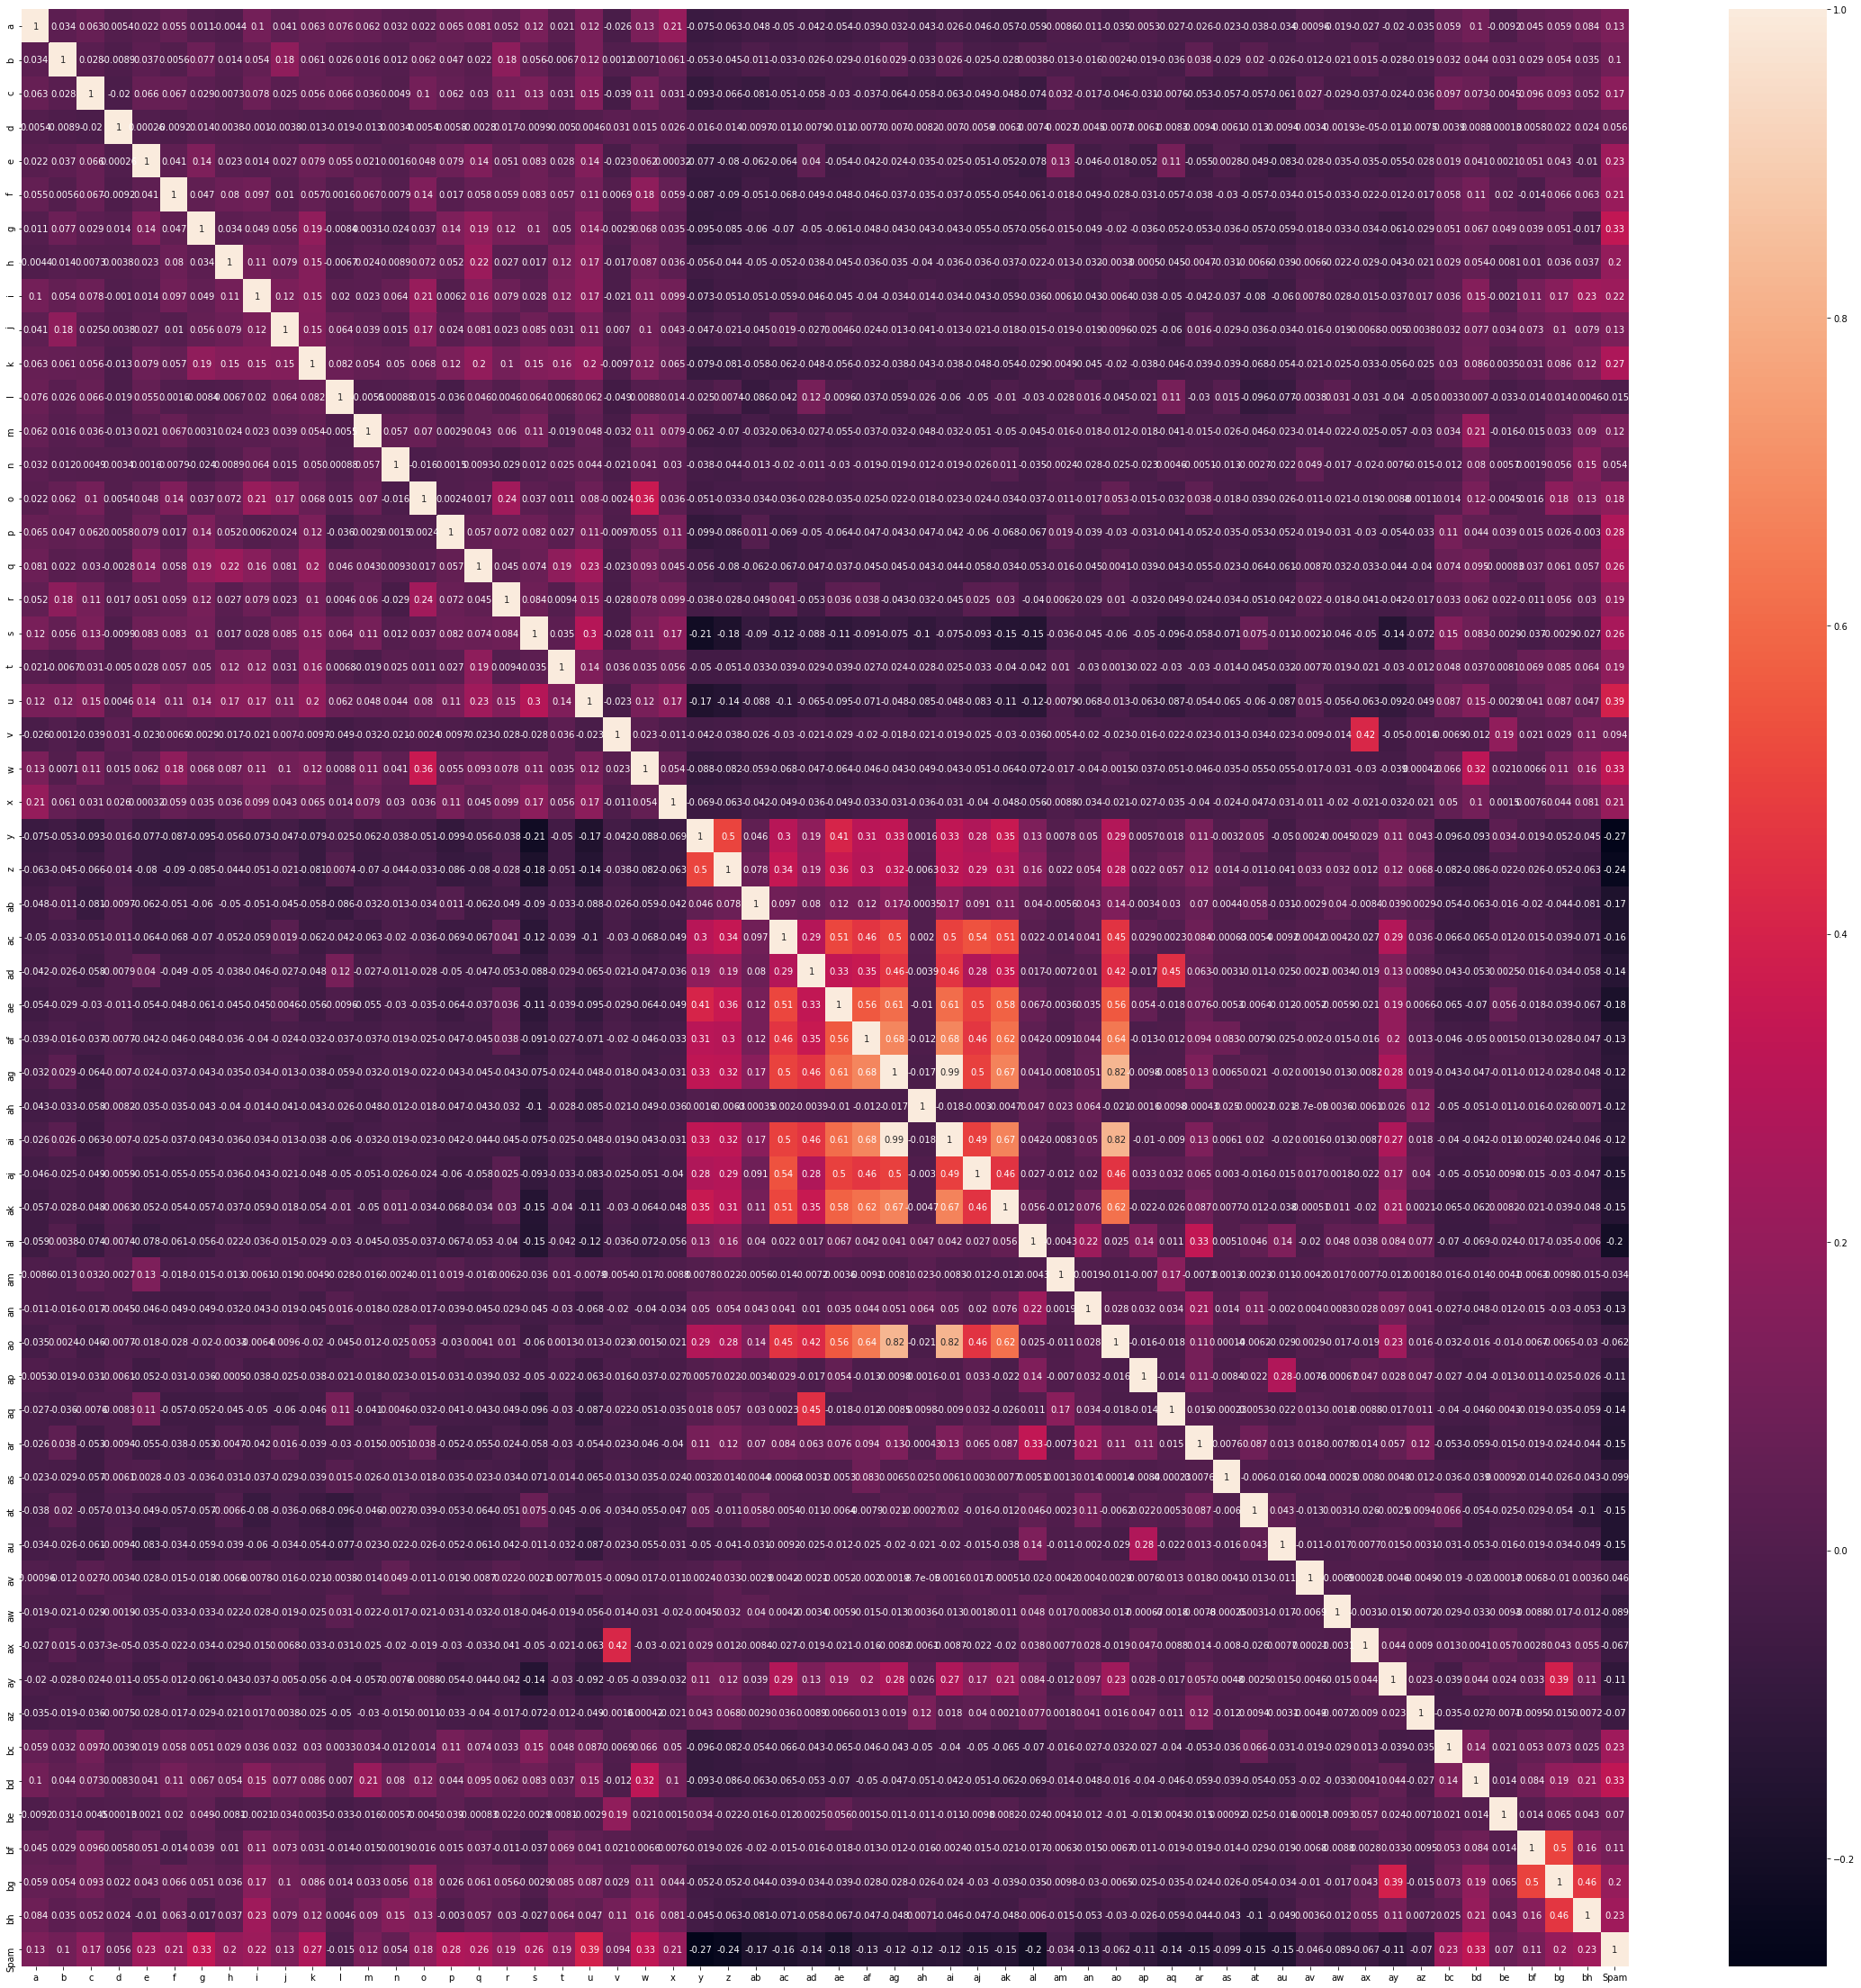

In [21]:
# Heatmap showing correlation of variables
plt.figure(figsize=(40, 40))

corr = spam.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

# Implementing the solution

Checking for normaility using a qq-plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


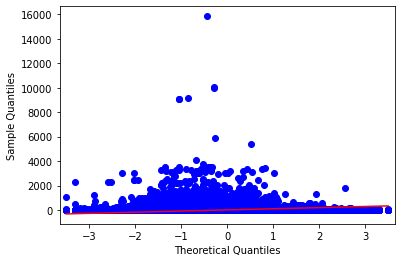

In [65]:
#Checking for normality in our data
from statsmodels.graphics.gofplots import qqplot as qq

# q-q plot
qq(spam, line='s')
plt.show()

We apply multinomial Naive Bayes classifier which is suitable for classification with discrete features and when the data is not normally distributed which is the case with our data.

In [51]:
#X = spam.iloc[:,:-1]
#y = spam.iloc[:,:58].values

X= spam.drop(['Spam'],1)
y = spam['Spam'].values

## Using the 80:20 partitioning

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [57]:
!pip install --exists-action=i scikit-learn

In [60]:
# Standardising the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [61]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()

In [62]:
# Fitting our model 
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
# Evaluating the Model
predicted = clf.predict(X_test)
print(np.mean(predicted == y_test))

0.9049881235154394


In [66]:
#
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [69]:
# Evaluating the model
print(confusion_matrix(y_test,predicted))
print('\n')
print(classification_report(y_test, predicted))

[[471  28]
 [ 52 291]]


              precision    recall  f1-score   support

           0       0.90      0.94      0.92       499
           1       0.91      0.85      0.88       343

    accuracy                           0.90       842
   macro avg       0.91      0.90      0.90       842
weighted avg       0.91      0.90      0.90       842



With the 80:20 partitioning the model achieves an accuracy of 90%. This is fairly good performance. It predicted 471 true negatives and 291 true positive predictions as seen on the confusion Matrix.

[TN FP
FN TP]

## Using the 70:30 partitioning

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [71]:
# Standardising the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [72]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()

In [73]:
# Fitting our model 
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
# Evaluating the Model
predicted = clf.predict(X_test)
print(np.mean(predicted == y_test))

0.9041963578780681


In [75]:
# Evaluating the model
print(confusion_matrix(y_test,predicted))
print('\n')
print(classification_report(y_test, predicted))

[[706  52]
 [ 69 436]]


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       758
           1       0.89      0.86      0.88       505

    accuracy                           0.90      1263
   macro avg       0.90      0.90      0.90      1263
weighted avg       0.90      0.90      0.90      1263



With the 70:30 partitioning the model achieves an accuracy of 90.4%. This is fairly good performance. It predicted 706 true negative and 436 true positive predictions as seen on the confusion Matrix.

## Using the 60:40 partitioning

In [83]:
X= spam.drop(['Spam'],1)
y = spam['Spam'].values

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=101)

In [85]:
# Standardising the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [86]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()

In [88]:
# Fitting our model 
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [89]:
# Evaluating the Model
predicted = clf.predict(X_test)
print(np.mean(predicted == y_test))

0.9067695961995249


In [90]:
# Evaluating the model
print(confusion_matrix(y_test,predicted))
print('\n')
print(classification_report(y_test, predicted))

[[951  60]
 [ 97 576]]


              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1011
           1       0.91      0.86      0.88       673

    accuracy                           0.91      1684
   macro avg       0.91      0.90      0.90      1684
weighted avg       0.91      0.91      0.91      1684



With the 60:40 partitioning the model achieves an accuracy of 90.6%. This is fairly good performance. It predicted 951 true negative and 576 true positive predictions as seen on the confusion Matrix.

The Variation of the model lies in the partitioning. The number of predictions increase as ratio of X and y tends to equal. However there is no noticeable change in the accuracy.

## Model Optimization 

alpha: (default 1.0) Another smoothing parameter alpha can be used for Laplace Lidstone smoothing in various Naive Bayes Algorithms.

We use alpha: 0.6

In [91]:
X= spam.drop(['Spam'],1)
y = spam['Spam'].values

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=101)

In [93]:
# Standardising the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [94]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB(alpha=0.6)

In [95]:
# Fitting our model 
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.6, class_prior=None, fit_prior=True)

In [96]:
# Evaluating the Model
predicted = clf.predict(X_test)
print(np.mean(predicted == y_test))

0.9055819477434679


In [97]:
# Evaluating the model
print(confusion_matrix(y_test,predicted))
print('\n')
print(classification_report(y_test, predicted))

[[948  63]
 [ 96 577]]


              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1011
           1       0.90      0.86      0.88       673

    accuracy                           0.91      1684
   macro avg       0.90      0.90      0.90      1684
weighted avg       0.91      0.91      0.91      1684



Using the 60:40 partioning and altering the value of alpha:(default=1), the number of true negative predictions reduces slightly from 951 to 948 and true positives increases by one from 576 to 577.

There is no significant change in accuracy.(90.5%)